# 3. Classification

#### Juan Julián Cea Morán

---

First of all, we have to import the data

In [19]:
import pickle
import pandas as pd

preproc_df = pickle.load(open("data/preproc_df.pkl", 'rb'))

---
### Prepare datasets
We have to create train and test dataset, so we have to split our dataset. But before do that, there are some operations that we need to perform.

First of all, we have to encode the categories into diferent numeric labels, conforming the targets.

In [20]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
preproc_df['Target'] = le.fit_transform([cat for cat in preproc_df['Category']])

In [71]:
labels = list(set(preproc_df['Category'].tolist()))

In [21]:
preproc_df.head()

,Preprocessed,Category,Target
0,"[read, book, town, everyone, uses, order, phar...",APR,0
1,"[recipes, appreciated, family, small, large, r...",APR,0
2,"[say, ease, author, even, made, effort, meet, ...",APR,0
3,"[milady, found, good, vein, anita, blake, base...",APR,0
4,"[somewhere, greece, gentlemen, decided, visit,...",APR,0


We need also to shuffle all samples.

In [22]:
preproc_df = preproc_df.sample(frac=1).reset_index(drop=True)

In [23]:
preproc_df.head()

,Preprocessed,Category,Target
0,"[first, one, related, database, conceptor, ide...",Conference_papers,1
1,"[group, strikes, hearts, teenagers, reason, sp...",APR,0
2,"[llama, presilla, especie, cordon, pequeno, se...",Wikipedia,3
3,"[sucre, placed, force, across, mountains, chim...",PAN11,2
4,"[rabotnicki, rabotnichki, kometal, equipo, fut...",Wikipedia,3


Now, it's time to split the dataset. To do that, we are gonna take 90% for train and 10% for test.

In [24]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(preproc_df, test_size=0.1)

In [46]:
import numpy as np

Y_train = np.asarray(train_df['Target'].tolist())
print(Y_train[0:15])

Y_test = np.asarray(test_df['Target'].tolist())
print(Y_test[0:15])

[3 3 3 3 3 3 3 3 2 1 3 3 0 3 3]
[3 3 2 3 3 3 3 3 3 2 0 3 1 2 3]


---

### Vectorize texts
The next step is to vectorize text. Our ML models are not able to work with strings, so we need to convert those strings into numbers. To do that, there are different approaches.

For the pourpose of this test, we are going to use some scikit-learn library.

In [50]:
%%time 
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vect = TfidfVectorizer(use_idf=True)
X_train = tfidf_vect.fit_transform([' '.join(text) for text in train_df['Preprocessed']])
X_test = tfidf_vect.transform([' '.join(text) for text in test_df['Preprocessed']])

print(type(X_train))

<class 'scipy.sparse.csr.csr_matrix'>
Wall time: 18.7 s


---
### Implementing the model
Once we have our data ready, it's time to test some models and get results. We are going to test models using scikit-learn library, which I said before is widely used in this domain.

#### **Multinomial Naive Bayes**
This classifier is suitable for text classification, since it is intended to be used with discrete features like word counts.

First, we have to train the model using the training data.

In [51]:
%%time
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, Y_train)

Wall time: 274 ms


MultinomialNB()

Now that the model is trained, it is ready to perform some predictions. We are using the score method to get the accuracy of the model.

In [94]:
Y_pred = clf.predict(X_test)

In [66]:
from sklearn import metrics

print('Accuracy MultinomialNB: ' + str(100 * metrics.accuracy_score(Y_test, Y_pred)) + '%')

Accuracy MultinomialNB: 83.96022481625594%


Another useful metric for supervised classification problem is the **confusion matrix**. This metric give us an indication of how the model is performing in terms of true and false positives 

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, normalize=False, figsize=(10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [95]:
from sklearn import metrics

# Inverse transform the label encoding
Y_test_cat = le.inverse_transform(Y_test)
Y_pred_cat = le.inverse_transform(Y_pred)

conf = metrics.confusion_matrix(Y_test, Y_predicted)

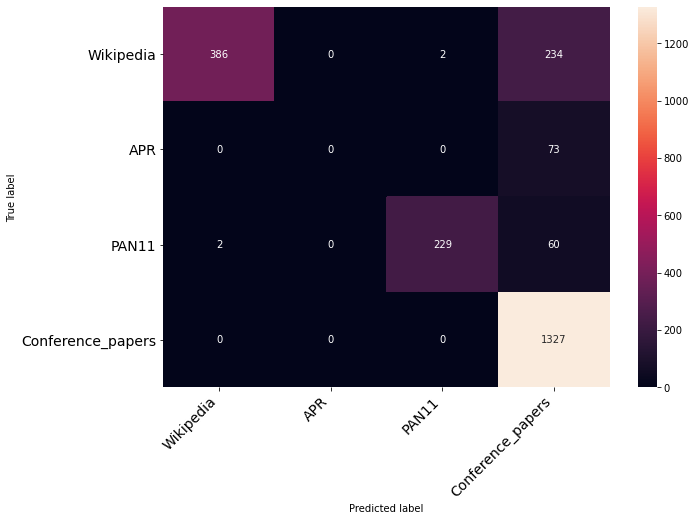

In [96]:
print_confusion_matrix(conf, labels);

**Conclusions of MultinomialNB**

As we can see